# NORDic package

**Abstract**

[NORDic](https://github.com/clreda/NORDic) is an open-source package which allows to focus on a network-oriented approach to identify regulatory mechanisms linked to a disease, and identify genes of interest.

## Citation

If you use NORDic in published research, please cite the following preliminary work:

> Réda, C., & Delahaye-Duriez, A. (2022). Prioritization of Candidate Genes Through Boolean Networks. In *International Conference on Computational Methods in Systems Biology* (pp. 89-121). Springer, Cham.

## Install NORDic (with PyPI)

In [1]:
! pip install --no-cache-dir NORDic==1.0.4
## Post-install...
! git clone https://github.com/cmap/cmapPy
! sed -i 's/temp_array = temp_array.astype(\"str\")/temp_array = np.core.defchararray.decode(temp_array, \"utf8\")  # <- introduced for Python3 compatibility/' cmapPy/cmapPy/pandasGEXpress/parse_gctx.py
! python3 -m pip install cmapPy/
! rm -rf cmapPy/
! python3 -m pip install git+https://github.com/bnediction/mpbn-sim.git@5f919c5c62e111628136d62357902966404b988e

In [2]:
! pip list --format=columns | grep NORDic

NORDic               1.0.4


In [3]:
import NORDic

## Network Identification (NORDic NI)

Let us identify a regulatory network which involves genes associated with Congenital Central Hypoventilation syndrome (also called "Ondine syndrome"), from scratch.

In [4]:
from NORDic.NORDic_NI.functions import network_identification, solution2cytoscape
from NORDic.UTILS.utils_grn import load_grn

### Parameters: ##TODO

In [9]:
seed_number=0
root="/media/kali/1b80f30d-2803-4260-a792-9ae206084252/Code/M30/"

file_folder="MODELS/Ondine/"
path_to_genes=None
NETWORK_fname = None
taxon_id=9606 # human

DISGENET_args = {
        "credentials": "tests/credentials_DISGENET.txt",
        "disease_cids": ["C1275808"],
        "min_score":0,
        "min_ei":0,
        "min_dsi":0.25,
        "min_dpi":0,
}

STRING_args = {
        "credentials": "tests/credentials_STRING.txt",
        "score": 0,
        "version": "v10.5",
}

LINCS_args = {
        "path_to_lincs": root+"data/lincs/",
        "credentials": "tests/credentials_LINCS.txt",
        "cell_lines": ["NPC", "SHSY5Y"],
        "pert_types": ["trt_sh", "trt_oe", "trt_xpr"],
        "selection": "distil_ss", 
        "thres_iscale": None,
        "nsigs": 2,
}

EDGE_args = {
        "beta": 1,
        "tau": 0,
        "cor_method": "pearson",
        "filter": True,
}

SIG_args = {
        "bin_thres": 0.5,
        "bin_method": "binary",
}

DESIRABILITY = {"DS": 3, "CL": 3, "Centr": 3, "GT": 1}

BONESIS_args = {
        "exp_ids": [],
        "use_diverse": True,
        "limit": 1,
        "niterations": 1,
        "exact": True,
        "max_maxclause": 3,
}

from multiprocessing import cpu_count
njobs=max(1,cpu_count()-2)

### Network identification

In [10]:
solution = network_identification(file_folder, taxon_id, path_to_genes, disgenet_args=DISGENET_args, string_args=STRING_args, lincs_args=LINCS_args, edge_args=EDGE_args, sig_args=SIG_args, bonesis_args=BONESIS_args, weights=DESIRABILITY, seed=seed_number, network_fname=NETWORK_fname, njobs=njobs)

--- DATA IMPORT ---
1. Import gene set from DisGeNET... <DISGENET> Retrieving genes... 1/1
... 7 genes imported.
2. Import network from STRING... ... 15 edges in model (including 0 directed edges) with a total of 6 non-isolated genes
3. Import experiments from LINCS L1000... 
	2 cell lines in which at least one of the genes has been perturbed (['NPC', 'SHSY5Y'])
<UTILS_DATA> Gene Symbol -> Gene ID (6 probes)
<BioDBNet> 1/1
6 probes (successful 6, unsuccessful 0)
	6 genes available (convertable to EntrezIDs)
<UTILS_DATA> Entrez ID -> LINCS L1000 (1/6)
8929	PHOX2B	1	6
<UTILS_DATA> Entrez ID -> LINCS L1000 (2/6)
1908	EDN3	2	6
<UTILS_DATA> Entrez ID -> LINCS L1000 (3/6)
5979	RET	3	6
<UTILS_DATA> Entrez ID -> LINCS L1000 (4/6)
2668	GDNF	4	6
<UTILS_DATA> Entrez ID -> LINCS L1000 (5/6)
497258; 627	BDNF	5	6
<UTILS_DATA> Entrez ID -> LINCS L1000 (6/6)
429	ASCL1	6	6
		6/6 genes retrieved in LINCS L1000
<UTILS_EXP> Gene 1/6 Cell 1/2 Type 1/3
<UTILS_EXP> Gene 2/6 Cell 1/2 Type 1/3
<UTILS_EXP> Gene

  0%|                                                                       | 0/1 [00:00<?, ?it/s]

Grounding...done in 0.0s
Found 1 solutions in 0.0s (first in 0.0s; rate 0.0s)

100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 70.27it/s]

--- SELECTION OF OPTIMAL MODEL ---
A. Select an optimal model based on a topological criteria...  ...

1 solutions (1 unique solutions)
... 1 solutions (0/6 constant genes in average)
<MODEL VISUALIZATION> Minimal solution: 20 edges
<MODEL VISUALIZATION> Maximal solution: 20 edges
            1
GTP  0.870143
<MODEL SELECTION> Saving optimal model in 'MODELS/Ondine//solution.bnet' ...ASCL1 <- !GDNF|(!BDNF&!EDN3&PHOX2B)
BDNF <- EDN3|(!ASCL1&!GDNF&!PHOX2B)
EDN3 <- GDNF|(!ASCL1&BDNF&!PHOX2B)
GDNF <- !PHOX2B|(!ASCL1&!BDNF&EDN3)
PHOX2B <- !BDNF|(ASCL1&!EDN3&!GDNF)

... saved!


In [11]:
if (solution is not None):
    solution = load_grn(file_folder+"solution.bnet")
    ## Convert to Cytoscape-readable file
    solution2cytoscape(solution, file_folder+"solution_cytoscape")

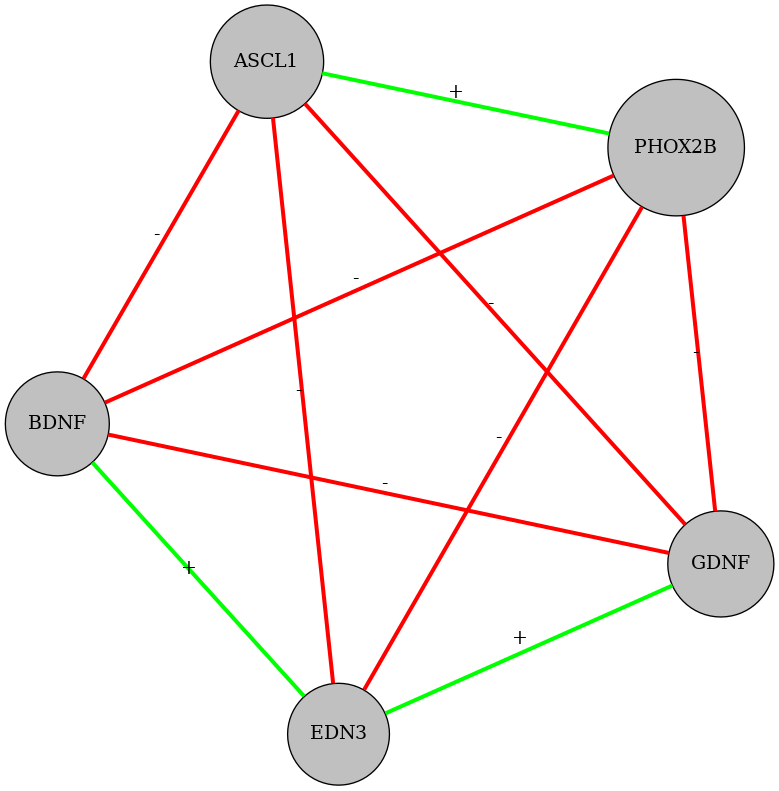

In [12]:
from IPython.display import Image
Image(filename=file_folder+'inferred_max_criterion_solution.png') 

In [14]:
with open(file_folder+"solution.bnet", "r") as f:
    network = f.read()
print(network)

ASCL1 <- !GDNF|(!BDNF&!EDN3&PHOX2B)
BDNF <- EDN3|(!ASCL1&!GDNF&!PHOX2B)
EDN3 <- GDNF|(!ASCL1&BDNF&!PHOX2B)
GDNF <- !PHOX2B|(!ASCL1&!BDNF&EDN3)
PHOX2B <- !BDNF|(ASCL1&!EDN3&!GDNF)


## Detection of Master Regulators (NORDic PMR)

On a dummy example.

In [15]:
import os
import numpy as np
import pandas as pd
from subprocess import call as sbcall
from glob import glob

from NORDic.UTILS.utils_plot import influences2graph
from NORDic.NORDic_PMR.functions import greedy

Create network

In [16]:
## Test: we expect X0 and X1 to be outputed, X10 to have no influence on the network because it is isolated
source = list(map(lambda x: "X%d" % x,[0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,4,5]))#,0]))
target = list(map(lambda x : "X%d" % x,[2,3,4,5,6,7,8,9,2,3,4,5,6,7,8,9,6,7,8,9]))#,11]))
genes = list(sorted(list(set(source+target))))+["X10"]

In [17]:
save_folder="MODELS/minimal/"
sbcall("mkdir -p "+save_folder, shell=True)

0

### Plot network

In [18]:
influences = np.zeros((len(genes), len(genes)))
for s, t in zip(source, target):
    influences[genes.index(s)][genes.index(t)] = 1
influences = pd.DataFrame(influences, index=genes, columns=genes)
influences2graph(influences, save_folder+"example", optional=False, compile2png=True, engine="sfdp")

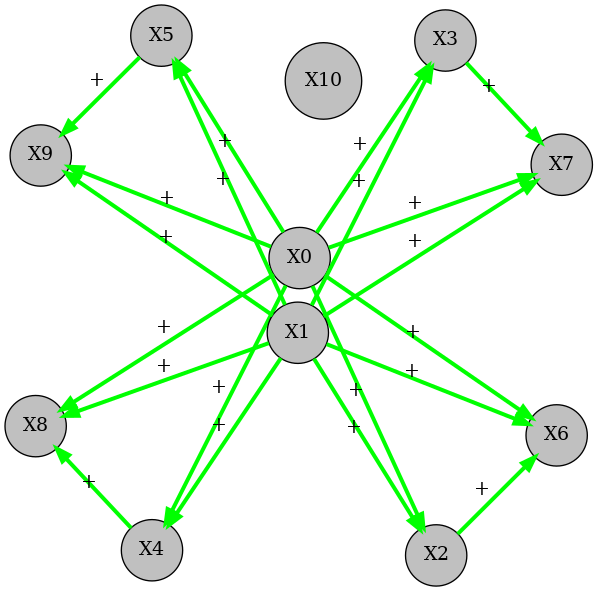

In [19]:
from IPython.display import Image
Image(filename=save_folder+'example.png') 

### Build network

In [20]:
grfs = {}
for si, s in enumerate(source):
    t = target[si]
    grf = grfs.get(t, [])
    grfs.update(dict([[t, list(set(grf+[s]))]]))
with open(save_folder+"example.bnet", "w") as f:
    network = []
    for g in genes:
        if (g in grfs):
            network += [g+", "+"&".join(grfs[g])]
        else:
            network += [g+", 1"]
    f.write("\n".join(network))

In [23]:
with open(save_folder+"example.bnet", "r") as f:
    network = f.read()
print("\n".join([" <- ".join(s.split(", ")) for s in network.split("\n")]))

X0 <- 1
X1 <- 1
X2 <- X1&X0
X3 <- X1&X0
X4 <- X1&X0
X5 <- X1&X0
X6 <- X1&X2&X0
X7 <- X1&X0&X3
X8 <- X1&X0&X4
X9 <- X1&X0&X5
X10 <- 1


In [22]:
gene_outputs = [x.split(", ")[0] for x in network.split("\n")[:-1] if (x.split(", ")[1] not in [x.split(", ")[0], "0", "1"])]

### Sample states at random

In [24]:
state_len = 100
states = pd.DataFrame([np.random.choice([0,1], p=[0.5,0.5], size=len(genes)).tolist() for _ in range(state_len)], columns=genes, index=range(state_len)).T
states

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
X0,1,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,0
X1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0
X2,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1
X3,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0
X4,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1
X5,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1
X6,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,1,1,1
X7,1,1,1,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0
X8,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0
X9,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1


### Parameters

In [26]:
seed_number=0
k=2

from multiprocessing import cpu_count
njobs=max(1,cpu_count()-2)

IM_params = {
    "seed": seed_number,
    "njobs": min(5, njobs),
    "gene_inputs": genes, # genes to be perturbed
    "gene_outputs": gene_outputs # genes to be observed
}
SIMU_params = {
    'nb_sims': 100,
    'rates': "fully_asynchronous",
    'thread_count': njobs,
    'depth': "constant_unitary",
}

### Detection of master regulators

In [29]:
S, spreads = greedy(save_folder+"example.bnet", k, states, IM_params, SIMU_params, save_folder=save_folder)

<NORD_PMR> Iteration k=2
	<NORD_PMR> Initial state 0
	<NORD_PMR> Initial state 2
	<NORD_PMR> Initial state 4
	<NORD_PMR> Initial state 1
	<NORD_PMR> Initial state 3
1 wild type attractors (initial state 0)
1 wild type attractors (initial state 2)
1 wild type attractors (initial state 4)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 0)
0 new mutant X0_OE {[]} attractors (1/11) (initial state 2)
0 new mutant X0_OE {[]} attractors (1/11) (initial state 4)
0 new mutant X1_OE {[]} attractors (2/11) (initial state 0)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 2)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 4)
1 new mutant X2_KO {[]} attractors (3/11) (initial state 0)
0 new mutant X2_OE {[]} attractors (3/11) (initial state 2)
0 new mutant X2_OE {[]} attractors (3/11) (initial state 4)
1 wild type attractors (initial state 1)
1 new mutant X3_KO {[]} attractors (4/11) (initial state 0)
1 wild type attractors (initial state 3)
0 new mutant X3_OE {[]} attrac


100%|██████████| 1/1 [00:00<00:00, 17772.47it/s]

100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]

100%|██████████| 1/1 [00:00<00:00, 37786.52it/s]

100%|██████████| 1/1 [00:00<00:00, 41120.63it/s]

100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]

100%|██████████| 1/1 [00:00<00:00, 39945.75it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 45417.48it/s]

100%|██████████| 1/1 [00:00<00:00, 38479.85it/s]

* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 5
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 6
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 5)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 5)
1 wild type attractors (initial state 6)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 5)
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 7
0 new mutant X2_OE {[]} attractors (3/11) (initial state 5)
0 new mutant X0_OE {[]} attractors (1/11) (ini


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 21732.15it/s]

100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]

100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 24818.37it/s]

100%|██████████| 1/1 [00:00<00:00, 24672.38it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 38175.15it/s]

100%|██████████| 100/100 [00:00<00:00, 35566.05it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 10
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 10)
	<NORD_PMR> Initial state 11
* X9_OE {[]}	- constant_un


100%|██████████| 1/1 [00:00<00:00, 38479.85it/s]

100%|██████████| 1/1 [00:00<00:00, 46603.38it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 39639.96it/s]

100%|██████████| 100/100 [00:00<00:00, 29812.38it/s]

100%|██████████| 100/100 [00:00<00:00, 31719.76it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 35690.13it/s]

100%|██████████| 100/100 [00:00<00:00, 30892.72it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 15
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 15)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 16
1 new mutant X0_KO {[]} attractors (1/11) (initial state 15)
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X1_OE {[]} attractors (2/11) (initial state 15)
1 wild type attractors (initial state 16)
0 new mutant X2_OE {[]} attractors (3/11) (initial state 15)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 16)
1 new mutant X3_KO {[]} attractors (4/11) (initial state 15)
* X9_OE {[]}	- 

100%|██████████| 100/100 [00:00<00:00, 29637.54it/s]

100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]

100%|██████████| 1/1 [00:00<00:00, 38836.15it/s]

* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 20
* X6_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 20)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X0_OE {[]} attractors (1/11) (initial state 20)
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X1_KO {[]} attractors (2/11) (initial state 20)
	<NORD_PMR> Initial state 21
0 new mutant X2_OE {[]} attractors (3/11) (initial state 20)
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X3_OE {[]} attractors (4/11) (initial state 20)
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X4_KO {[]} attractors (5/11) (initial state 20)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronou



100%|██████████| 100/100 [00:00<00:00, 32388.45it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]

100%|██████████| 1/1 [00:00<00:00, 35246.25it/s]

100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]

100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]

100%|██████████| 1/1 [00:00<00:00, 39568.91it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]

100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 35338.31it/s]

100%|██████████| 100/100 [00:00<00:00, 32587.24it/s]

100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]

100%|██████████| 100/100 [00:00<00:00, 28280.66it/s]

* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 25)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X0_OE {[]} attractors (1/11) (initial state 25)
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X1_KO {[]} attractors (2/11) (initial state 25)
	<NORD_PMR> Initial state 26
0 new mutant X2_OE {[]} attractors (3/11) (initial state 25)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X3_KO {[]} attractors (4/11) (initial state 25)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X4_OE {[]} attractors (5/11) (initial state 25)
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 26)
1 new mutant X5_KO {[]} attractors (6/11) (initial state 25)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 26)
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronou


100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]

100%|██████████| 100/100 [00:00<00:00, 33020.82it/s]


100%|██████████| 100/100 [00:00<00:00, 41880.22it/s]

100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]

100%|██████████| 100/100 [00:00<00:00, 30854.08it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]

100%|██████████| 100/100 [00:00<00:00, 35075.30it/s]

100%|██████████| 100/100 [00:00<00:00, 36304.89it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 30032.25it/s]

100%|██████████| 100/100 [00:00<00:00, 28505.53it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 38130.04it/s]

1 wild type attractors (initial state 30)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X0_KO {[]} attractors (1/11) (initial state 30)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 31
0 new mutant X1_OE {[]} attractors (2/11) (initial state 30)
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X2_OE {[]} attractors (3/11) (initial state 30)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X3_KO {[]} attractors (4/11) (initial state 30)
1 wild type attractors (initial state 31)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X4_KO {[]} attractors (5/11) (initial state 30)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 31)
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X5_KO {[]} attractors (6/11) (initial state 30)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 


100%|██████████| 100/100 [00:00<00:00, 36264.08it/s]

100%|██████████| 1/1 [00:00<00:00, 21183.35it/s]

100%|██████████| 1/1 [00:00<00:00, 33825.03it/s]

100%|██████████| 1/1 [00:00<00:00, 39199.10it/s]

100%|██████████| 100/100 [00:00<00:00, 33476.77it/s]

100%|██████████| 100/100 [00:00<00:00, 31163.56it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 38836.15it/s]

	<NORD_PMR> Initial state 35
	<NORD_PMR> Initial state 36
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 35)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X0_OE {[]} attractors (1/11) (initial state 35)
1 wild type attractors (initial state 36)
0 new mutant X1_OE {[]} attractors (2/11) (initial state 35)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X0_OE {[]} attractors (1/11) (initial state 36)
0 new mutant X2_OE {[]} attractors (3/11) (initial state 35)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 36)
1 new mutant X3_KO {[]} attractors (4/11) (initial state 35)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X2_OE {[]} attractors (3/11) (initial state 36)
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X4_OE {[]} attra


100%|██████████| 100/100 [00:00<00:00, 19856.57it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 36805.05it/s]

100%|██████████| 1/1 [00:00<00:00, 28532.68it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 18187.08it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 33844.14it/s]

* X5_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 41
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 40)
0 new mutant X0_OE {[]} attractors (1/11) (initial state 40)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 41)
0 new mutant X1_OE {[]} attractors (2/11) (initial state 40)
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X0_KO {[]} attractors (1/11) (initial state 41)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X1_OE {[]} attractors (2/11) (initial state 41)
0 new mutant X2_OE {[]} attractors (3/11) (initial state 40)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X2_KO {[]} attractors (3/11) (initial state 41)
1 new mutant X3_KO {[]} attractors (4/11) (initial state 40)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 33243.27it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 32152.58it/s]

100%|██████████| 100/100 [00:00<00:00, 32007.81it/s]

* X6_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 46
	<NORD_PMR> Initial state 45
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 46)
1 wild type attractors (initial state 45)
0 new mutant X0_OE {[]} attractors (1/11) (initial state 46)
0 new mutant X0_OE {[]} attractors (1/11) (initial state 45)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X1_OE {[]} attractors (2/11) (initial state 46)
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X1_KO {[]} attractors (2/11) (initial state 45)
0 new mutan

100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]

100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]

100%|██████████| 1/1 [00:00<00:00, 37786.52it/s]

100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]

100%|██████████| 1/1 [00:00<00:00, 43690.67it/s]

100%|██████████| 100/100 [00:00<00:00, 33748.83it/s]

100%|██████████| 100/100 [00:00<00:00, 14387.21it/s]

100%|██████████| 100/100 [00:00<00:00, 36415.21it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 50)
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X0_KO {[]} attractors (1/11) (initial state 50)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 50)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X2_KO {[]} attractors (3/11) (initial state 50)
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X3_OE {[]} attractors (4/11) (initial state 50)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 51
1 new mutant X4_KO {[]} attractors (5/11) (initial state 50)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X5_KO {[]} attractors (6/11) (initial state 50)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X6_KO {[]} at


100%|██████████| 100/100 [00:00<00:00, 24933.44it/s]

100%|██████████| 1/1 [00:00<00:00, 36472.21it/s]

100%|██████████| 1/1 [00:00<00:00, 38836.15it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 20310.42it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 31029.84it/s]

	<NORD_PMR> Initial state 55
* X4_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 55)
0 new mutant X0_OE {[]} attractors (1/11) (initial state 55)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 55)
* X5_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X2_OE {[]} attractors (3/11) (initial state 55)
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X3_KO {[]} attractors (4/11) (initial state 55)
1 new mutant X4_KO {[]} attractors (5/11) (initial state 55)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {[]}	- const


100%|██████████| 1/1 [00:00<00:00, 35848.75it/s]

100%|██████████| 100/100 [00:00<00:00, 35075.30it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 27594.11it/s]

100%|██████████| 1/1 [00:00<00:00, 38130.04it/s]

100%|██████████| 100/100 [00:00<00:00, 42864.63it/s]

100%|██████████| 100/100 [00:00<00:00, 28852.61it/s]

* X3_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 60
* X5_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 60)
* X5_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X0_OE {[]} attractors (1/11) (initial state 60)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X1_OE {[]} attractors (2/11) (initial state 60)
0 new mutant X2_OE {[]} attractors (3/11) (initial state 60)
* X6_OE 


100%|██████████| 100/100 [00:00<00:00, 25242.56it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]

100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]

100%|██████████| 100/100 [00:00<00:00, 38381.26it/s]

100%|██████████| 100/100 [00:00<00:00, 32448.58it/s]

100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 30430.99it/s]

* X4_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 65
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 65)
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X0_KO {[]} attractors (1/11) (initial state 65)
0 new mutant X1_OE {[]} attractors (2/11) (initial state 65)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X2_KO {[]} attractors (3/11) (initial state 65)
* X6_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X3_KO {[]} attractors (4/11) (initial state 65)
0 new mutant X


100%|██████████| 1/1 [00:00<00:00, 30174.85it/s]

100%|██████████| 1/1 [00:00<00:00, 24385.49it/s]

100%|██████████| 100/100 [00:00<00:00, 38182.10it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0 new mutant X1_OE {[]} attractors (2/11) (initial state 70)
* X4_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X2_KO {[]} attractors (3/11) (initial state 70)
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X3_OE {[]} attractors (4/11) (initial state 70)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X4_KO {[]} attractors (5/11) (initial state 70)
1 new mutant X5_KO {[]} attractors (6/11) (initial state 70)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X6_OE {[]} attractors (7/11) (initial state 70)
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 71
1 new mutant X7_KO {[]} attractors (8/11) (initial state 70)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE


100%|██████████| 1/1 [00:00<00:00, 38130.04it/s]

100%|██████████| 100/100 [00:00<00:00, 36264.08it/s]

100%|██████████| 100/100 [00:00<00:00, 35072.36it/s]

100%|██████████| 1/1 [00:00<00:00, 37786.52it/s]

100%|██████████| 100/100 [00:00<00:00, 36605.90it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 40163.78it/s]


100%|██████████| 100/100 [00:00<00:00, 41128.69it/s]

100%|██████████| 1/1 [00:00<00:00, 40329.85it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 37566.54it/s]

100%|██████████| 100/100 [00:00<00:00, 32403.46it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 35213.70it/s]

0 new mutant X1_OE {[]} attractors (2/11) (initial state 75)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X2_OE {[]} attractors (3/11) (initial state 75)
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X3_KO {[]} attractors (4/11) (initial state 75)
* X6_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X4_OE {[]} attractors (5/11) (initial state 75)
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 76
0 new mutant X5_OE {[]} attractors (6/11) (initial state 75)
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X6_OE {[]} attractors (7/11) (initial state 75)
1 new mutant X7_KO {[]} attractors (8/11) (initial state 75)
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 76)
0 new mutant X8_OE {[]} attract

100%|██████████| 100/100 [00:00<00:00, 31378.05it/s]

100%|██████████| 1/1 [00:00<00:00, 39568.91it/s]

100%|██████████| 100/100 [00:00<00:00, 32113.19it/s]

100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 39067.66it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 35684.06it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 42366.71it/s]

100%|██████████| 1/1 [00:00<00:00, 29959.31it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 40010.53it/s]

100%|██████████| 1/1 [00:00<00:00, 29746.84it/s]

1 new mutant X3_KO {[]} attractors (4/11) (initial state 80)
* X9_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X4_KO {[]} attractors (5/11) (initial state 80)
1 new mutant X5_KO {[]} attractors (6/11) (initial state 80)
* X7_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X6_KO {[]} attractors (7/11) (initial state 80)
* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X7_KO {[]} attractors (8/11) (initial state 80)
0 new mutant X8_OE {[]} attractors (9/11) (initial state 80)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X9_OE {[]} attractors (10/11) (initial state 80)
	<NORD_PMR> Initial state 81
	<NORD_PMR> Initial state 82
0 new mutant X10_OE {[]} attractors (11/11) (initial state 80)
* X0_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 83
* X9_OE {[]}	- con


100%|██████████| 100/100 [00:00<00:00, 26286.69it/s]

100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]

100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]

100%|██████████| 1/1 [00:00<00:00, 42366.71it/s]

100%|██████████| 1/1 [00:00<00:00, 38130.04it/s]

100%|██████████| 100/100 [00:00<00:00, 36408.89it/s]

100%|██████████| 100/100 [00:00<00:00, 31818.42it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 46821.88it/s]

100%|██████████| 100/100 [00:00<00:00, 35475.80it/s]

* X10_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X8_KO {[]} attractors (9/11) (initial state 85)
1 new mutant X9_KO {[]} attractors (10/11) (initial state 85)
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X10_KO {[]} attractors (11/11) (initial state 85)
* X0_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 86
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 87
	<NORD_PMR> Initial state 88
1 wild type attractors (initial state 86)
0 new mutant X0_OE {[]} attractors (1/11) (initial state 86)
* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 87)
1 wild type attractors (initial state 88)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 86)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 87)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 88)
* X1_KO {[]}	- consta


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 30696.02it/s]

100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 28023.68it/s]

100%|██████████| 100/100 [00:00<00:00, 32127.95it/s]

100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]

100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]

100%|██████████| 100/100 [00:00<00:00, 34781.52it/s]

100%|██████████| 1/1 [00:00<00:00, 39199.10it/s]

0 new mutant X6_OE {[]} attractors (7/11) (initial state 90)
0 new mutant X7_OE {[]} attractors (8/11) (initial state 90)
	<NORD_PMR> Initial state 91
* X7_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X8_KO {[]} attractors (9/11) (initial state 90)
	<NORD_PMR> Initial state 92
0 new mutant X9_OE {[]} attractors (10/11) (initial state 90)
	<NORD_PMR> Initial state 93
1 wild type attractors (initial state 91)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 91)
* X8_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X10_OE {[]} attractors (11/11) (initial state 90)
* X0_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X1_OE {[]} attractors (2/11) (initial state 91)
1 wild type attractors (initial state 92)
1 new mutant X2_KO {[]} attractors (3/11) (initial state 91)
1 wild type attractors (initial state 93)
1 new mutant X0_KO {[]} attractors (1/11) (initial state 92)
0 new mutant X3_OE {[]} attractors



100%|██████████| 100/100 [00:00<00:00, 36279.77it/s]

100%|██████████| 100/100 [00:00<00:00, 37906.05it/s]

100%|██████████| 1/1 [00:00<00:00, 29330.80it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]

100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]

100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]

100%|██████████| 1/1 [00:00<00:00, 20068.44it/s]

0 new mutant X0_OE {[]} attractors (1/11) (initial state 96)
1 wild type attractors (initial state 97)
0 new mutant X1_OE {[]} attractors (2/11) (initial state 96)
0 new mutant X0_OE {[]} attractors (1/11) (initial state 97)
* X1_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X2_OE {[]} attractors (3/11) (initial state 96)
1 new mutant X1_KO {[]} attractors (2/11) (initial state 97)
	<NORD_PMR> Initial state 98
1 new mutant X3_KO {[]} attractors (4/11) (initial state 96)
* X8_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X2_OE {[]} attractors (3/11) (initial state 97)
1 new mutant X4_KO {[]} attractors (5/11) (initial state 96)
1 new mutant X3_KO {[]} attractors (4/11) (initial state 97)
1 new mutant X5_KO {[]} attractors (6/11) (initial state 96)
1 new mutant X4_KO {[]} attractors (5/11) (initial state 97)
* X2_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X6_OE {[]} attractors (7/11) (initial state 

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 43690.67it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 50753.92it/s]

* X9_KO {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {[]}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* S = [] (all states)
        0     1     2     3     4     5     6     7     8     9    10    11  \
X0   1.00  1.00  0.00  0.00  0.00  1.00  0.00  1.00  1.00  1.00  0.00  1.00   
X1   0.00  0.00  1.00  0.00  1.00  1.00  0.00  1.00  1.00  1.00  1.00  0.00   
X10  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
X2   0.14  0.14  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.14  0.14  0.14   
X3   0.14  0.14  0.00  0.00  0.14  0.14  0.14  0.14  0.00  0.00  0.00  0.00   
X4   0.00  0.14  0.14  0.14  0.00  0.00  0.00  0.14  0.00  0.00  0.00  0.14   
X5   0.00  0.14  0.14  0.00  0.00  0.14  0.00  0.14  0.14  0.14  0.00  0.00   
X6   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
X7   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
X8   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  


100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]

100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]


100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]

100%|██████████| 1/1 [00:00<00:00, 31775.03it/s]

100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]

100%|██████████| 1/1 [00:00<00:00, 39199.10it/s]

100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]

100%|██████████| 1/1 [00:00<00:00, 26051.58it/s]

100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]

100%|██████████| 1/1 [00:00<00:00, 16256.99it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 32930.08it/s]

100%|██████████| 1/1 [00:00<00:00, 39568.91it/s]

100%|██████████| 1/1 [00:00<00:00, 36792.14it/s]



* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_K


100%|██████████| 1/1 [00:00<00:00, 43240.25it/s]

100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]

100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]

100%|██████████| 1/1 [00:00<00:00, 29127.11it/s]


100%|██████████| 1/1 [00:00<00:00, 38836.15it/s]


100%|██████████| 1/1 [00:00<00:00, 45590.26it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 39199.10it/s]

100%|██████████| 1/1 [00:00<00:00, 45100.04it/s]

100%|██████████| 1/1 [00:00<00:00, 41527.76it/s]

100%|██████████| 1/1 [00:00<00:00, 46603.38it/s]

100%|██████████| 1/1 [00:00<00:00, 40329.85it/s]

100%|██████████| 1/1 [00:00<00:00, 43690.67it/s]

100%|██████████| 1/1 [00:00<00:00, 32513.98it/s]

100%|██████████| 1/1 [00:00<00:00, 33288.13it/s]

100%|██████████| 1/1 [00:00<00:00, 30615.36it/s]

100%|██████████| 1/1 [00:00<00:00, 22429.43it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* 

100%|██████████| 100/100 [00:00<00:00, 39221.10it/s]

100%|██████████| 1/1 [00:00<00:00, 33554.43it/s]

100%|██████████| 1/1 [00:00<00:00, 39568.91it/s]

100%|██████████| 1/1 [00:00<00:00, 39568.91it/s]

100%|██████████| 100/100 [00:00<00:00, 32668.46it/s]

* X10_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 11
* X10_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 11)
	<NORD_PMR> Initial state 17
	<NORD_PMR> Initial state 19
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 11)
0 new mutant X2_KO {['X0']} attractors (2/10) (initial state 11)
1 new mutant X3_OE {['X0']} attractors (3/10) (initial state 11)
1 wild type attractors (initial state 17)
1 wild type attractors (initial state 19)
	<NORD_PMR> Initial state 13
0 new mutant X4_KO {['X0']} attractors (4/10) (initial state 11)
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 19)
0 new mutant X1_OE {['X0']} attractors (1/10) (initial state 17)
1 new mutant X5_OE {['X0']} attractors (5/10) (initial state 11)
0 new mutant X2_KO {['X0']} attractors (2/10) (initial state 19)
1 new mutant X6_OE {['X


100%|██████████| 100/100 [00:00<00:00, 38578.96it/s]

100%|██████████| 1/1 [00:00<00:00, 41527.76it/s]

100%|██████████| 1/1 [00:00<00:00, 42366.71it/s]

100%|██████████| 1/1 [00:00<00:00, 38130.04it/s]

100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 25420.02it/s]

100%|██████████| 1/1 [00:00<00:00, 27060.03it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 41124.66it/s]

100%|██████████| 100/100 [00:00<00:00, 37078.36it/s]

1 new mutant X4_KO {['X0']} attractors (4/10) (initial state 20)
1 wild type attractors (initial state 22)
	<NORD_PMR> Initial state 26
0 new mutant X5_OE {['X0']} attractors (5/10) (initial state 20)
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 22)
1 wild type attractors (initial state 24)
0 new mutant X6_OE {['X0']} attractors (6/10) (initial state 20)
	<NORD_PMR> Initial state 28
1 new mutant X2_OE {['X0']} attractors (2/10) (initial state 22)
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 24)
1 new mutant X7_KO {['X0']} attractors (7/10) (initial state 20)
1 wild type attractors (initial state 26)
0 new mutant X3_KO {['X0']} attractors (3/10) (initial state 22)
1 new mutant X2_OE {['X0']} attractors (2/10) (initial state 24)
0 new mutant X8_OE {['X0']} attractors (8/10) (initial state 20)
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 26)
0 new mutant X4_KO {['X0']} attractors (4/10) (initial state 22)
0 new mutant X3_KO {['X0']} attracto


100%|██████████| 100/100 [00:00<00:00, 36711.63it/s]

100%|██████████| 100/100 [00:00<00:00, 43316.16it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 39283.54it/s]


100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]

100%|██████████| 1/1 [00:00<00:00, 44620.26it/s]

100%|██████████| 1/1 [00:00<00:00, 38479.85it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 42268.51it/s]

	<NORD_PMR> Initial state 29
0 new mutant X9_OE {['X0']} attractors (9/10) (initial state 25)
* X2_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X7_KO {['X0']} attractors (7/10) (initial state 27)
1 new mutant X10_KO {['X0']} attractors (10/10) (initial state 23)
* X1_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X8_OE {['X0']} attractors (8/10) (initial state 27)
0 new mutant X10_OE {['X0']} attractors (10/10) (initial state 25)
* X1_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 29)
1 new mutant X1_KO {['X0']} attractors (1/10) (initial state 29)
1 new mutant X9_OE {['X0']} attractors (9/10) (initial state 27)
* X3_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X2_OE {['X0']} attractors (2/10) (initial state 29)
* X2_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X3_OE {['X0']} attractors (3/10) (ini


100%|██████████| 1/1 [00:00<00:00, 40721.40it/s]

100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]

100%|██████████| 1/1 [00:00<00:00, 46603.38it/s]

100%|██████████| 1/1 [00:00<00:00, 45590.26it/s]

100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]

100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]

100%|██████████| 100/100 [00:00<00:00, 37144.03it/s]


100%|██████████| 1/1 [00:00<00:00, 40721.40it/s]

100%|██████████| 100/100 [00:00<00:00, 37644.09it/s]

100%|██████████| 100/100 [00:00<00:00, 35362.14it/s]

1 new mutant X4_OE {['X0']} attractors (4/10) (initial state 38)
* X2_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X5_OE {['X0']} attractors (5/10) (initial state 38)
* X5_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X6_KO {['X0']} attractors (6/10) (initial state 38)
* X3_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X7_KO {['X0']} attractors (7/10) (initial state 38)
0 new mutant X8_KO {['X0']} attractors (8/10) (initial state 38)
* X3_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X9_OE {['X0']} attractors (9/10) (initial state 38)
* X5_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X10_KO {['X0']} attractors (1


100%|██████████| 1/1 [00:00<00:00, 34100.03it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 38130.04it/s]

100%|██████████| 1/1 [00:00<00:00, 22310.13it/s]

100%|██████████| 1/1 [00:00<00:00, 37786.52it/s]

100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]

100%|██████████| 100/100 [00:00<00:00, 38472.79it/s]


100%|██████████| 100/100 [00:00<00:00, 30200.92it/s]

100%|██████████| 100/100 [00:00<00:00, 33000.03it/s]

100%|██████████| 100/100 [00:00<00:00, 36805.05it/s]

0 new mutant X5_KO {['X0']} attractors (5/10) (initial state 39)
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X10_KO {['X0']} attractors (10/10) (initial state 37)
* X1_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X3_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X6_KO {['X0']} attractors (6/10) (initial state 39)
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X7_KO {['X0']} attractors (7/10) (initial state 39)
1 new mutant X8_OE {['X0']} attractors (8/10) (initial state 39)
* X5_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X9_OE {['X0']} attractors (9/10) (initial state 39)
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X2_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X10_KO {['X0']} attractors (10/10) (initial state 39)
* X1_KO {['X0']}	- constant_unitary_depth{}	


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 25103.57it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 41943.04it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 31927.41it/s]

100%|██████████| 1/1 [00:00<00:00, 42799.02it/s]

100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]

100%|██████████| 1/1 [00:00<00:00, 28728.11it/s]

100%|██████████| 100/100 [00:00<00:00, 44145.92it/s]

100%|██████████| 1/1 [00:00<00:00, 21290.88it/s]

100%|██████████| 100/100 [00:00<00:00, 41905.33it/s]

100%|██████████| 100/100 [00:00<00:00, 39224.76it/s]

1 new mutant X9_OE {['X0']} attractors (9/10) (initial state 48)
* X2_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X10_OE {['X0']} attractors (10/10) (initial state 48)
* X1_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X3_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X2_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X3_KO {['X0']}


100%|██████████| 100/100 [00:00<00:00, 33018.22it/s]

100%|██████████| 100/100 [00:00<00:00, 30127.17it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 22259.22it/s]

100%|██████████| 1/1 [00:00<00:00, 30393.51it/s]

100%|██████████| 100/100 [00:00<00:00, 37610.33it/s]

100%|██████████| 1/1 [00:00<00:00, 41120.63it/s]

* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X3_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_

100%|██████████| 1/1 [00:00<00:00, 38479.85it/s]

100%|██████████| 100/100 [00:00<00:00, 37385.72it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 50729.37it/s]

100%|██████████| 100/100 [00:00<00:00, 43919.41it/s]

100%|██████████| 1/1 [00:00<00:00, 41527.76it/s]

100%|██████████| 100/100 [00:00<00:00, 35184.16it/s]

100%|██████████| 100/100 [00:00<00:00, 37735.53it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]

* X8_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X3_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 51
* X10_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 51)
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 51)
* X8_KO {['

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]

100%|██████████| 1/1 [00:00<00:00, 13706.88it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 60
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X5_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 60)
0 new mutant X1_OE {['X0']} attractors (1/10) (initial state 60)
	<NORD_PMR> Initial state 62
0 new mutant X2_OE {['X0']} attractors (2/10) (initial state 60)
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X3_OE {['X0']} attractors (3/10) (initial stat


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 42486.87it/s]

100%|██████████| 1/1 [00:00<00:00, 40329.85it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 28435.96it/s]

100%|██████████| 100/100 [00:00<00:00, 14350.79it/s]

100%|██████████| 100/100 [00:00<00:00, 45299.75it/s]

100%|██████████| 100/100 [00:00<00:00, 42264.25it/s]

100%|██████████| 1/1 [00:00<00:00, 41120.63it/s]

* X7_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 63
* X6_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 61
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 63)
1 wild type attractors (initial state 61)
* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 63)
1 new mutant X1_KO {['X0']} attractors (1/10) (initial state 61)
1 new mutant X2_OE {['X0']} attractors (2/10) (initial state 63)
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X2_OE {['X0']} attractors (2/10) (initial state 61)
1 new mutant X3_OE {['X0']} attractors (3/10) (initial state 63)
1 new mutant X3_KO {['X0']} attract


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 41943.04it/s]

100%|██████████| 1/1 [00:00<00:00, 36157.79it/s]

100%|██████████| 100/100 [00:00<00:00, 44421.78it/s]

100%|██████████| 1/1 [00:00<00:00, 28339.89it/s]

* X7_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 70)
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 72
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 70)
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X2_KO {['X0']} attractors (2/10) (initial state 70)
1 new mutant X3_OE {['X0']} attractors (3/10) (initial state 70)
1 wild type attractors (initial state 72)
0 new mutant X4_KO {['X0']} attractors (4/10) (initial state 70)
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 72)
0 new mutant X5_KO {['X0']} attractors (5/10) (initial state 70)
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X2_OE {['X0']} attractors (2/10) (initial state 72)
	<NORD_PMR> Initial state 74
1 new mutant X6_OE {['X0']} attractors (6/10) (

100%|██████████| 100/100 [00:00<00:00, 34228.04it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 28696.66it/s]

100%|██████████| 1/1 [00:00<00:00, 31300.78it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


100%|██████████| 100/100 [00:00<00:00, 38043.57it/s]

100%|██████████| 100/100 [00:00<00:00, 31091.95it/s]

100%|██████████| 1/1 [00:00<00:00, 30840.47it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 40329.85it/s]

* X7_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 71)
1 wild type attractors (initial state 73)
1 new mutant X1_KO {['X0']} attractors (1/10) (initial state 71)
1 new mutant X1_KO {['X0']} attractors (1/10) (initial state 73)
1 new mutant X2_KO {['X0']} attractors (2/10) (initial state 71)
* X7_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X2_KO {['X0']} attractors (2/10) (initial state 73)
1 new mutant X3_OE {['X0']} attractors (3/10) (initial state 71)
	<NORD_PMR> Initial state 75
0 new mutant X4_KO {['X0']} attractors (4/10) (initial state 71)
0 new mutant X3_KO {['X0']} attractors (3/10) (initial state 73)
0 new mutant X4_KO {['X0']} attractors (4/10) (initial state 73)
0 new mutant X5_KO {['X0']} attractors (5/10) (initial state 71)
* X8_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X6_OE


100%|██████████| 1/1 [00:00<00:00, 32768.00it/s]

100%|██████████| 1/1 [00:00<00:00, 41943.04it/s]

100%|██████████| 100/100 [00:00<00:00, 27758.46it/s]

100%|██████████| 1/1 [00:00<00:00, 34952.53it/s]

100%|██████████| 100/100 [00:00<00:00, 33474.09it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X3_OE {['X0']} attractors (3/10) (initial state 82)
0 new mutant X5_KO {['X0']} attractors (5/10) (initial state 80)
0 new mutant X6_KO {['X0']} attractors (6/10) (initial state 80)
1 new mutant X4_KO {['X0']} attractors (4/10) (initial state 82)
* X8_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 84)
0 new mutant X7_KO {['X0']} attractors (7/10) (initial state 80)
0 new mutant X5_OE {['X0']} attractors (5/10) (initial state 82)
1 new mutant X1_OE {['X0']} attractors (1/10) (initial state 84)
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X6_OE {['X0']} attractors (6/10) (initial state 82)
1 new mutant X8_OE {['X0']} attractors (8/10) (initial state 80)
1 new mutant X2_OE {['X0']} attractors (2/10) (initial state 84)
1 new mutant X7_KO {['X0']} attractors (7/10) (initial state 82)
1 new mutant X3_OE {['X0']} at

100%|██████████| 100/100 [00:00<00:00, 36111.10it/s]

100%|██████████| 100/100 [00:00<00:00, 36374.16it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]

100%|██████████| 1/1 [00:00<00:00, 41527.76it/s]

1 new mutant X1_KO {['X0']} attractors (1/10) (initial state 85)
0 new mutant X6_KO {['X0']} attractors (6/10) (initial state 83)
0 new mutant X5_OE {['X0']} attractors (5/10) (initial state 81)
1 new mutant X2_KO {['X0']} attractors (2/10) (initial state 85)
1 new mutant X7_OE {['X0']} attractors (7/10) (initial state 83)
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X6_KO {['X0']} attractors (6/10) (initial state 81)
* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X3_OE {['X0']} attractors (3/10) (initial state 85)
1 new mutant X8_OE {['X0']} attractors (8/10) (initial state 83)
1 new mutant X7_KO {['X0']} attractors (7/10) (initial state 81)
1 new mutant X4_KO {['X0']} attractors (4/10) (initial state 85)
0 new mutant X9_KO {['X0']} attractors (9/10) (initial state 83)
0 new mutant X8_OE {['X0']} attractors (8/10) (initial state 81)
1 new mutant X5_KO {['X0']} attractors (5/10) (initial state 85)
0 new mutant 

100%|██████████| 100/100 [00:00<00:00, 43649.75it/s]

100%|██████████| 100/100 [00:00<00:00, 44940.58it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 42014.46it/s]

100%|██████████| 100/100 [00:00<00:00, 44417.07it/s]

* X9_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X6_KO {['X0']} attractors (6/10) (initial state 94)
* X2_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X7_KO {['X0']} attractors (7/10) (initial state 94)
* X2_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X10_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X8_OE {['X0']} attractors (8/10) (initial state 94)
* X3_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X9_OE {['X0']} attractors (9/10) (initial state 94)
* X3_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NORD_PMR> Initial state 96
0 new mutant X10_OE {['X0']} attractors (10/10) (initial state 94)
* X1_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
	<NO


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 45644.84it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 31020.66it/s]

100%|██████████| 1/1 [00:00<00:00, 37449.14it/s]

100%|██████████| 1/1 [00:00<00:00, 32017.59it/s]

100%|██████████| 1/1 [00:00<00:00, 26379.27it/s]

100%|██████████| 1/1 [00:00<00:00, 45100.04it/s]

100%|██████████| 100/100 [00:00<00:00, 36772.79it/s]

* X3_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 99)
	<NORD_PMR> Initial state 97
* X2_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
0 new mutant X1_OE {['X0']} attractors (1/10) (initial state 99)
* X5_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X4_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 wild type attractors (initial state 97)
1 new mutant X2_KO {['X0']} attractors (2/10) (initial state 99)
* X3_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
1 new mutant X1_KO {['X0']} attractors (1/10) (initial state 97)
0 new mutant X3_OE {['X0']} attractors (3/10) (initial state 99)
0 new mutant X2_OE {['X0']} attractors (2/10) (initial state 97)
1 new mutant X4_KO {['X0']} attractors (4/10) (initial state 99)
* X5_KO {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}
* X6_OE {['X0']}	- constant_unitary_depth{}	fully_asynchronous_rates{}



100%|██████████| 100/100 [00:00<00:00, 26425.81it/s]

100%|██████████| 100/100 [00:00<00:00, 39438.68it/s]

In [30]:
S = [x for s in S for x in s]
assert all([s in ["X0","X1"] for s in S])

In [31]:
S

['X0', 'X1']

In [32]:
spreads

,[['X0']],"[['X0'], ['X1']]"
X0,0.464086,0.753211
X1,0.404445,0.753211
X2,0.052429,0.489238
X3,0.073319,0.506904
X4,0.071913,0.512839
X5,0.077546,0.506904
X6,0.000000,0.464086
X7,0.000000,0.464086
X8,0.000000,0.464086
X9,0.000000,0.464086


As expected, nodes X0 and X1 are the most regulatory in this network.